<a href="https://colab.research.google.com/github/lilasowmi/sowmi/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will use Logistic Regression to model the "Pima Indians Diabetes" data set. This model will predict which people are likely to develop diabetes.


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline
import seaborn as sns

## Load and review data

In [2]:
pdata = pd.read_csv("/content/archive (1).zip")

In [3]:
pdata.shape # Check number of columns and rows in data frame

(388, 13)

In [4]:
pdata.head() # To check first 5 rows of data set

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [5]:
pdata.isnull().values.any() # If there are any null values in data set

False

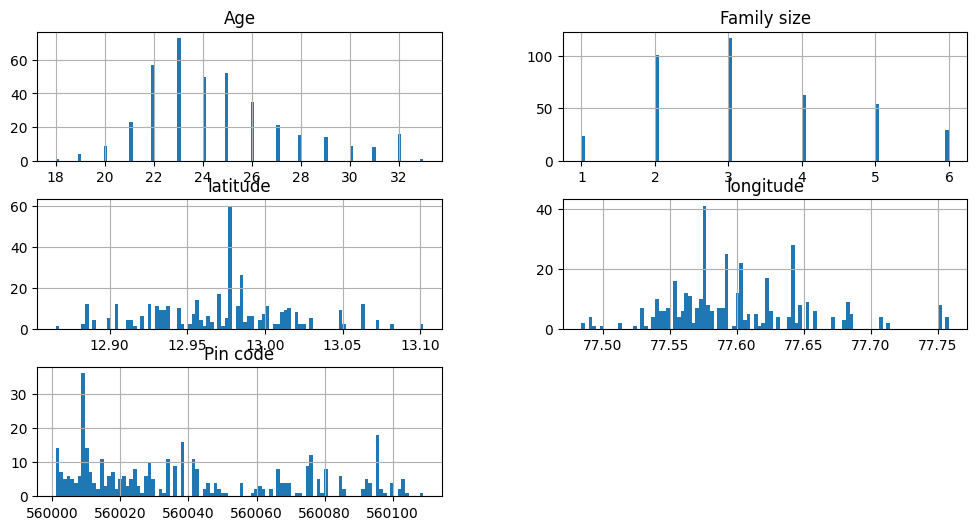

In [6]:
columns = list(pdata)[0:-1] # Excluding Outcome column which has only
pdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));
# Histogram of first 8 columns

## Identify Correlation in data

In [7]:
pdata.corr() # It will show correlation matrix

<ipython-input-7-62cb07725ffb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pdata.corr() # It will show correlation matrix


,Age,Family size,latitude,longitude,Pin code
Age,1.000000,0.169982,0.006595,0.047500,0.137294
Family size,0.169982,1.000000,-0.053537,0.070126,-0.009402
latitude,0.006595,-0.053537,1.000000,-0.144234,-0.201813
longitude,0.047500,0.070126,-0.144234,1.000000,0.156119
Pin code,0.137294,-0.009402,-0.201813,0.156119,1.000000


In [8]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

<ipython-input-8-e894ad87ce8c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


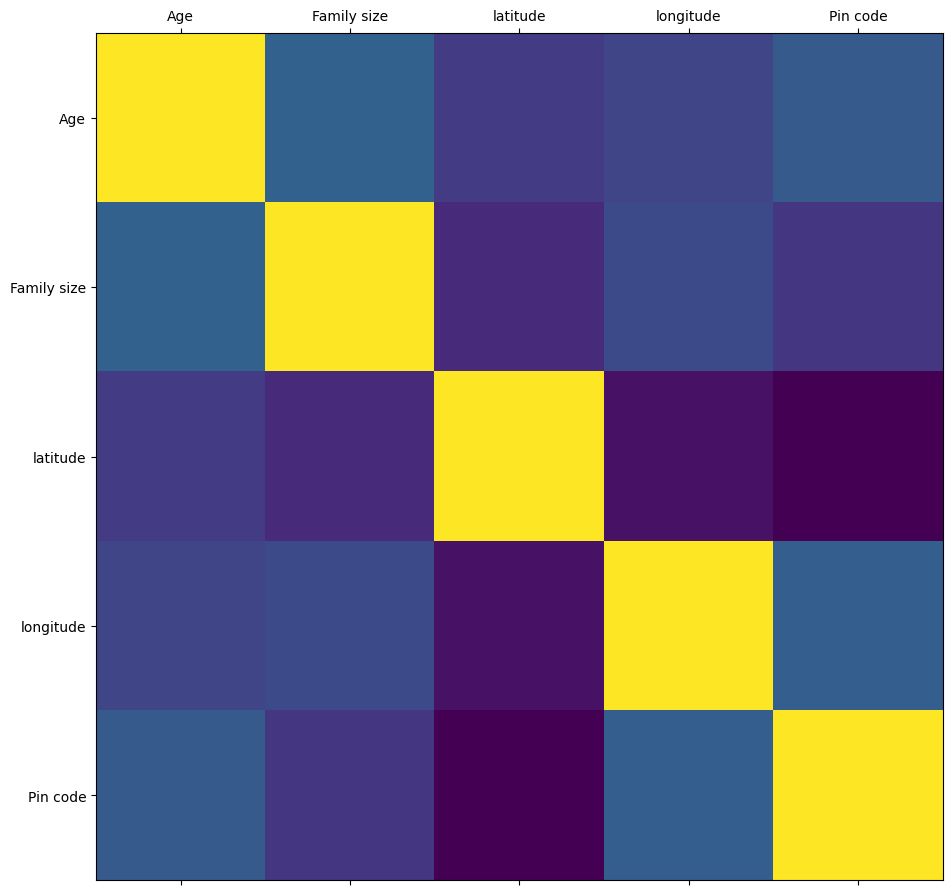

In [9]:
plot_corr(pdata)

In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation.
We can see none of variable have correlation with any other variables.

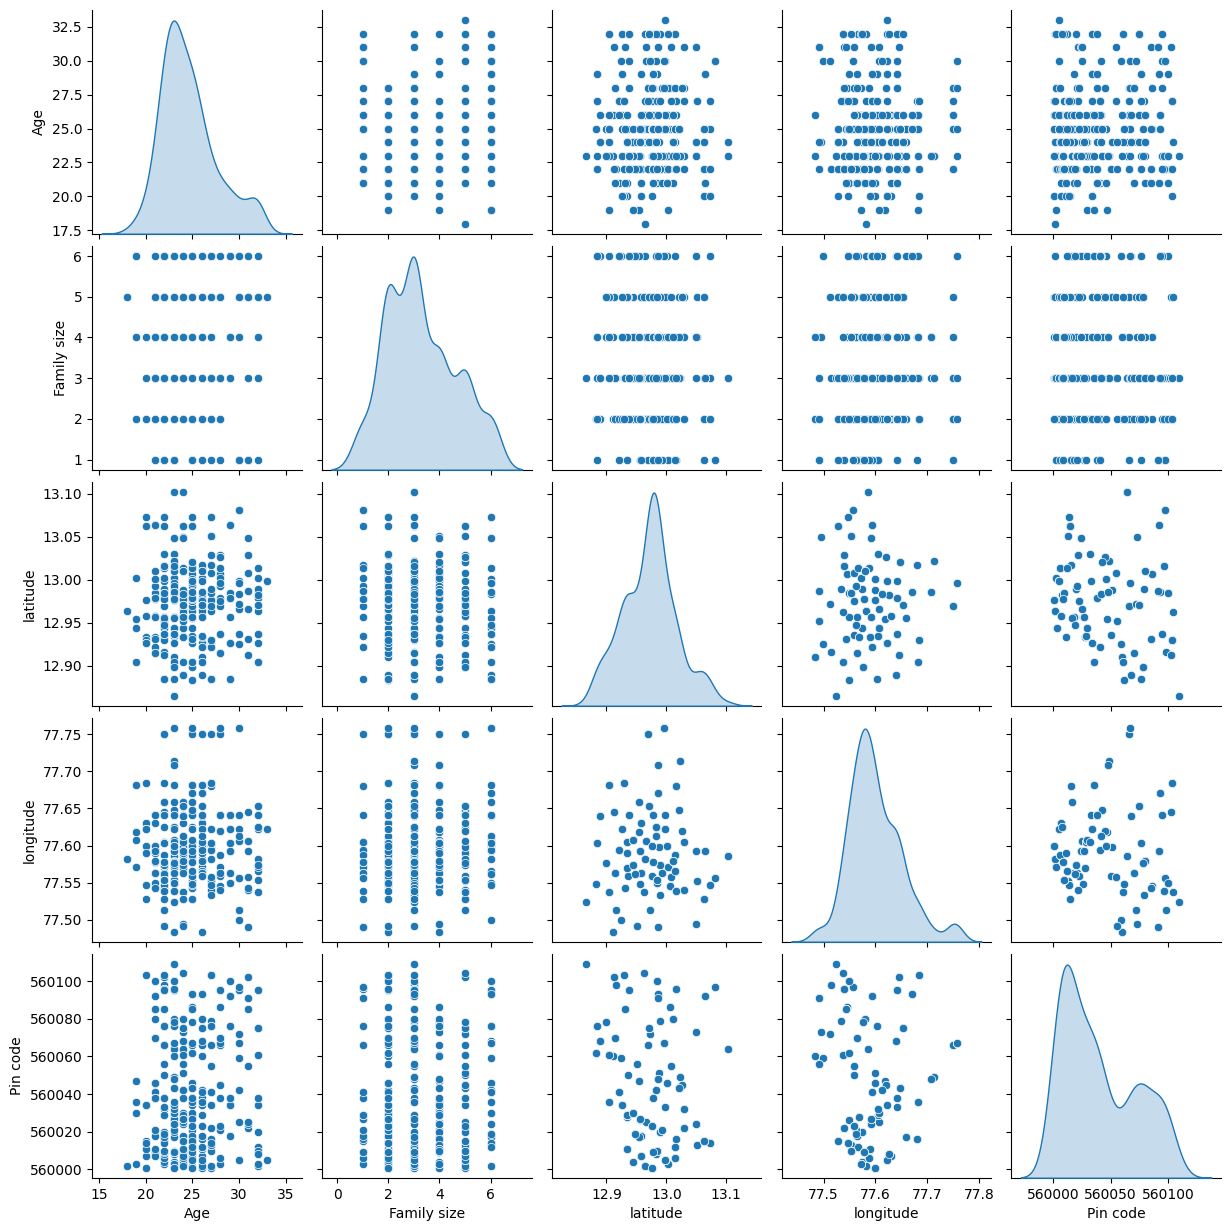

In [10]:
sns.pairplot(pdata,diag_kind='kde')

## Calculate diabetes ratio of True/False from outcome variable

In [11]:
n_true = len(pdata.loc[pdata['Family size'] == True])
n_false = len(pdata.loc[pdata['Family size'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 24 (100.00%)
Number of false cases: 0 (0.00%)


So we have 34.90% people in current data set who have diabetes and rest of 65.10% doesn't have diabetes.

Its a good distribution True/False cases of diabetes in data.

## Spliting the data
We will use 70% of data for training and 30% for testing.

In [12]:
from sklearn.model_selection import train_test_split

X = pdata.drop('Family size',axis=1)     # Predictor feature columns (8 X m)
Y = pdata['Family size']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
278,30,Male,Married,Employee,More than 50000,Graduate,12.9719,77.5128,560072,No,Negative,No
345,22,Female,Single,Employee,25001 to 50000,Graduate,12.8845,77.6036,560076,Yes,Positive,Yes
236,22,Male,Single,Student,No Income,Graduate,13.0158,77.5390,560096,Yes,Positive,Yes
232,24,Female,Single,Self Employeed,25001 to 50000,Post Graduate,13.0103,77.5796,560080,No,Negative,No
306,23,Female,Single,Student,No Income,Post Graduate,12.9766,77.5993,560001,Yes,Positive,Yes


Lets check split of data

In [13]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

79.90% data is in training set
20.10% data is in test set


# Data Preparation

### Check hidden missing values

As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.

In [14]:
x_train.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
278,30,Male,Married,Employee,More than 50000,Graduate,12.9719,77.5128,560072,No,Negative,No
345,22,Female,Single,Employee,25001 to 50000,Graduate,12.8845,77.6036,560076,Yes,Positive,Yes
236,22,Male,Single,Student,No Income,Graduate,13.0158,77.5390,560096,Yes,Positive,Yes
232,24,Female,Single,Self Employeed,25001 to 50000,Post Graduate,13.0103,77.5796,560080,No,Negative,No
306,23,Female,Single,Student,No Income,Post Graduate,12.9766,77.5993,560001,Yes,Positive,Yes


In [15]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 278 to 37
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         310 non-null    int64  
 1   Gender                      310 non-null    object 
 2   Marital Status              310 non-null    object 
 3   Occupation                  310 non-null    object 
 4   Monthly Income              310 non-null    object 
 5   Educational Qualifications  310 non-null    object 
 6   latitude                    310 non-null    float64
 7   longitude                   310 non-null    float64
 8   Pin code                    310 non-null    int64  
 9   Output                      310 non-null    object 
 10  Feedback                    310 non-null    object 
 11  Unnamed: 12                 310 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 31.5+ KB


We can see lots of 0 entries above.

### Replace 0s with serial mean

In [17]:

from sklearn.impute import SimpleImputer
import pandas as pd

# Define non-numeric columns
non_numeric_cols = x_train.select_dtypes(exclude=["int64", "float64"]).columns

# Impute missing values in x_test for non-numeric columns with most frequent value
rep_1 = SimpleImputer(strategy="most_frequent")
x_test_non_numeric = pd.DataFrame(rep_1.fit_transform(x_test[non_numeric_cols]), columns=non_numeric_cols)

# Impute missing values in x_test for numeric columns with mean value
numeric_cols = x_test.select_dtypes(include=["int64", "float64"]).columns
rep_0 = SimpleImputer(strategy="mean")
x_test_numeric = pd.DataFrame(rep_0.fit_transform(x_test[numeric_cols]), columns=numeric_cols)

# Concatenate imputed non-numeric and numeric columns
x_test_imputed = pd.concat([x_test_non_numeric, x_test_numeric], axis=1)

# Reassign column names
x_test_imputed.columns = x_train.columns

# Display head of x_train
print(x_test_imputed.head())

      Age   Gender  Marital Status      Occupation Monthly Income  \
0  Female   Single         Student       No Income  Post Graduate   
1  Female  Married  Self Employeed  25001 to 50000  Post Graduate   
2    Male   Single         Student       No Income  Post Graduate   
3    Male   Single         Student  25001 to 50000  Post Graduate   
4    Male   Single         Student       No Income  Post Graduate   

  Educational Qualifications  latitude longitude  Pin code   Output  Feedback  \
0                        Yes  Positive       Yes      24.0  12.9770   77.5773   
1                         No  Positive        No      25.0  12.9570   77.5637   
2                        Yes  Positive       Yes      25.0  12.9770   77.5773   
3                        Yes  Positive       Yes      23.0  13.0158   77.5390   
4                        Yes  Positive       Yes      24.0  12.9706   77.6529   

   Unnamed: 12  
0     560009.0  
1     560018.0  
2     560009.0  
3     560096.0  
4     560075.

# Logistic Regression

In [19]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Assuming x_train, y_train, x_test are already defined

# Fit the model on train
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict on test
y_predict = model.predict(x_test)

# Create DataFrame to display coefficients
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)


ValueError: could not convert string to float: 'Male'

In [20]:
model_score = model.score(x_test, y_test)
print(model_score)

ValueError: could not convert string to float: 'Female'

<AxesSubplot:>

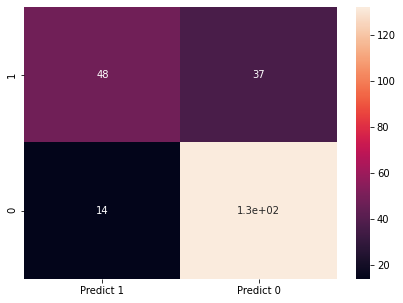

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 48

True Negatives (TN): we correctly predicted that they don't have diabetes 132

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 14 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 37 Falsely predict negative Type II error